##Introduction


In this project, I explore the use of machine learning models to predict the next-day closing prices of five major stocks: **AAPL**, **GOOGL**, **MSFT**, **AMZN**, and **TSLA**.

The dataset consists of daily historical stock data from 2018 to 2023, which includes **open**, **high**, **low**, **close**, and **volume**.

I engineered a set of lag-based and technical features, such as previous day close, moving averages, price ranges, and volatility indicators, to capture trends and patterns in stock behavior.

Four models were developed and compared: **Linear Regression**, **Random Forest**, **Gradient Boosting Regressor**, and **XGBoost**.

The models were evaluated using **Mean Absolute Error** (MAE), **Mean Squared Error** (MSE), and **R²** score, with per-ticker results analyzed to assess performance across stocks with different volatility and trend characteristics.

In [49]:
#Install and import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [50]:
#Define the list of 5 stocks I would like to include in the model
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
results = []


##LINEAR REGRESSION MODEL

/tmp/ipython-input-51-1308265653.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

 Processing AAPL


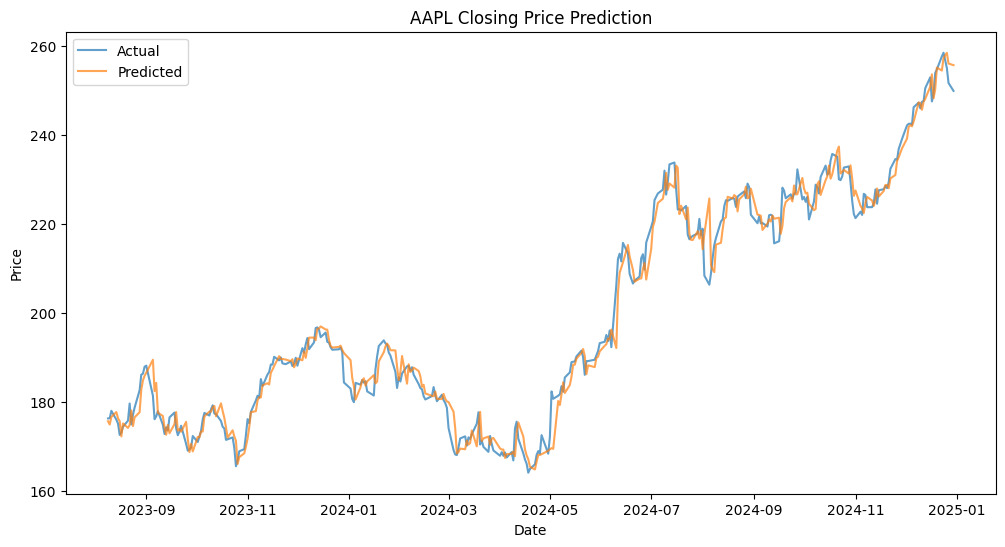

/tmp/ipython-input-51-1308265653.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

 Processing GOOGL


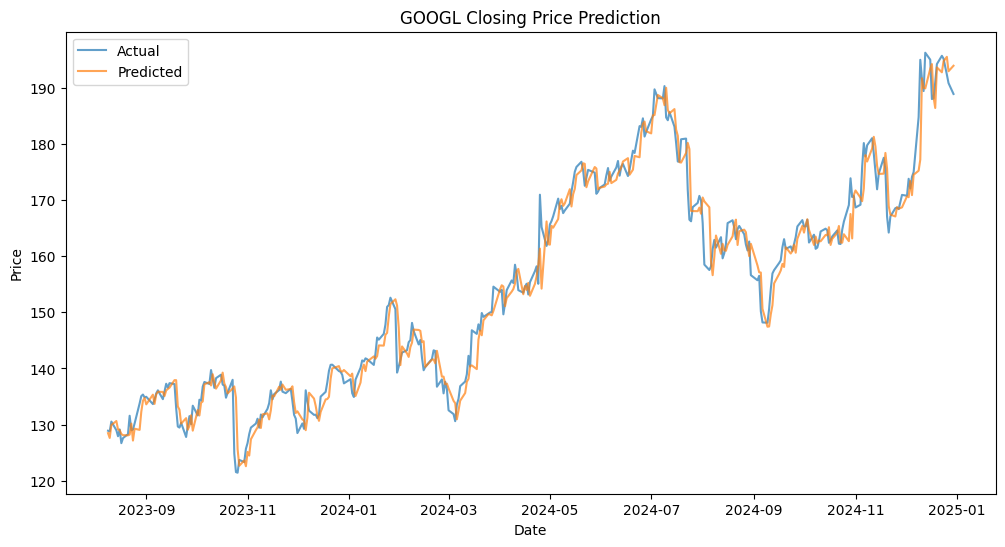

/tmp/ipython-input-51-1308265653.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

 Processing MSFT


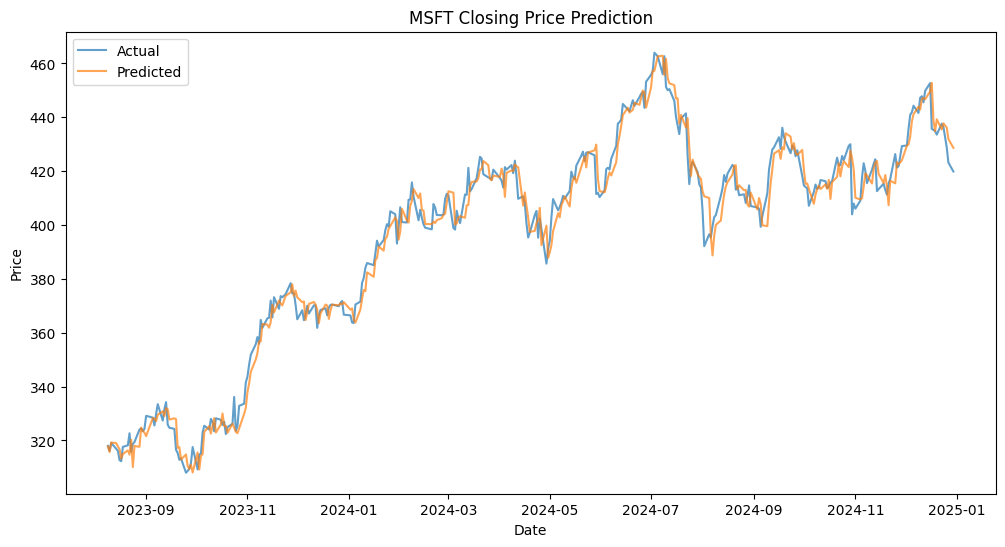

/tmp/ipython-input-51-1308265653.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

 Processing AMZN


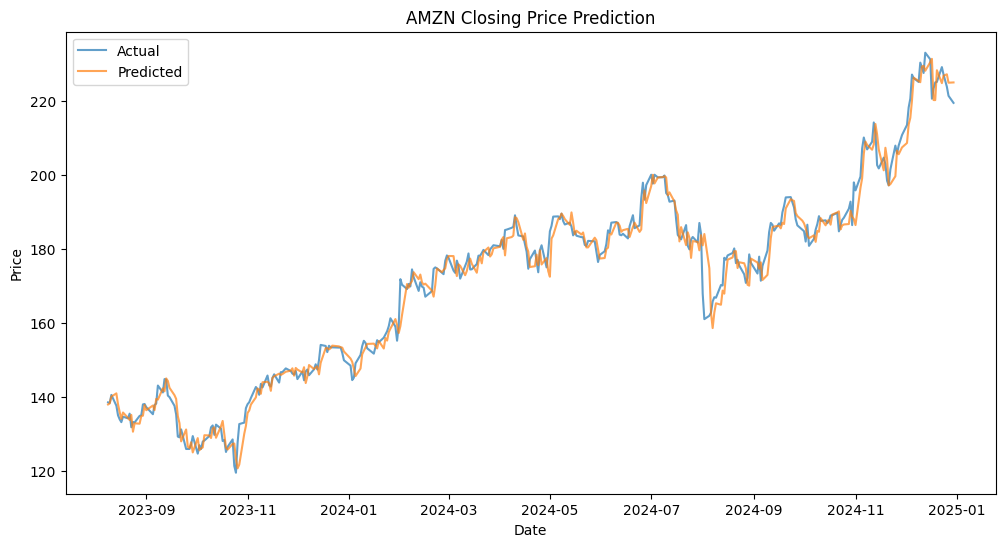

/tmp/ipython-input-51-1308265653.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

 Processing TSLA


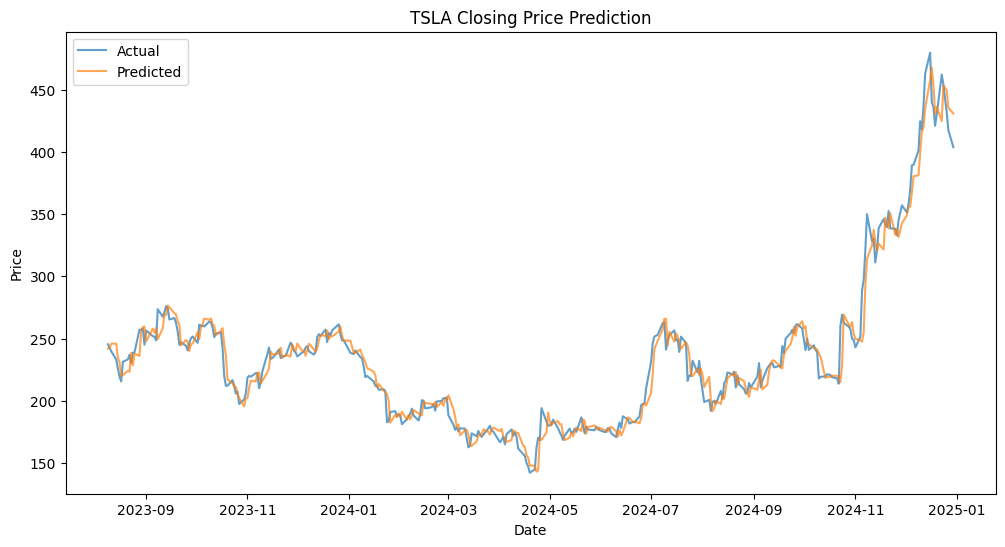

In [51]:
for ticker in tickers:
    print(f" Processing {ticker}")

    # Download dataset
    df = yf.download(ticker, start="2018-01-01", end="2025-01-01")

    # Define Target variable
    df['Target'] = df['Close'].shift(-1)

    # Feature Engineering
    df['Close_shift1'] = df['Close'].shift(1)
    df['Volume_shift1'] = df['Volume'].shift(1)
    df['Range'] = df['High'] - df['Low']
    df['Gain'] = df['Close'] - df['Open']
    df['MA5'] = df['Close'].rolling(5).mean()
    df['MA10'] = df['Close'].rolling(10).mean()
    df['Vol_MA5'] = df['Volume'].rolling(5).mean()
    df.dropna(inplace=True)

    # Define X and y
    X = df[['Close_shift1', 'Volume_shift1', 'Range', 'Gain', 'MA5', 'MA10', 'Vol_MA5']]
    y = df['Target']

    # Train/test split
    split_index = int(0.8 * len(df))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Ticker': ticker,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(y_test.index, y_test, label='Actual', alpha=0.7)
    plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
    plt.title(f"{ticker} Closing Price Prediction")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

In [52]:
results_df = pd.DataFrame(results)

results_df['MAE'] = results_df['MAE'].round(2)
results_df['MSE'] = results_df['MSE'].round(2)
results_df['R2'] = results_df['R2'].round(4)

results_df

,Ticker,MAE,MSE,R2
0,AAPL,2.45,11.28,0.9819
1,GOOGL,2.34,11.17,0.9688
2,MSFT,4.29,30.80,0.9805
3,AMZN,2.65,13.61,0.9797
4,TSLA,7.61,116.71,0.9686


Linear Regression achieved strong performance, with **R² > 0.96** for all tickers and even **>0.98** for **AAPL and MSFT.**

Prediction errors were low: MAE as low as 2-4 for most stocks, though higher (~7.6) for **TSLA** due to its volatility.

The strong results suggest that the engineered features (lagged close, moving averages, etc.) effectively capture linear trends in stock prices.

As a simple model, Linear Regression is fast and interpretable, making it a solid baseline for comparison.

However, it assumes purely linear relationships and may not capture the non-linear patterns and volatility present in some stocks, particularly **TSLA**.

##GRADIENT BOOSTING REGRESSOR GBR MODEL


In [64]:
from sklearn.ensemble import GradientBoostingRegressor

/tmp/ipython-input-66-3316982394.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

📊 Processing AAPL


✅ AAPL done: MAE=4.16, R²=0.8202


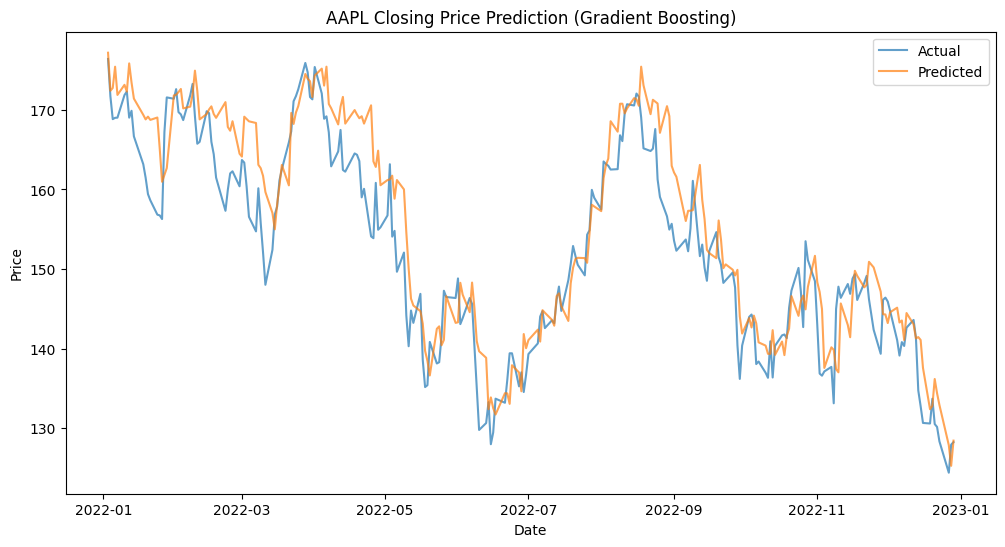

📊 Processing GOOGL


/tmp/ipython-input-66-3316982394.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


✅ GOOGL done: MAE=3.85, R²=0.9072


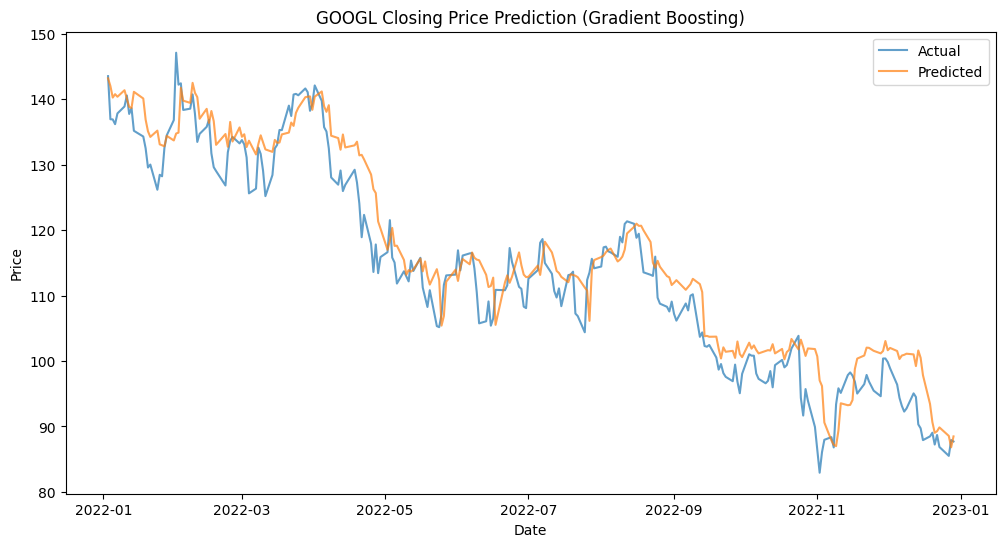

/tmp/ipython-input-66-3316982394.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

📊 Processing MSFT


✅ MSFT done: MAE=7.24, R²=0.8563


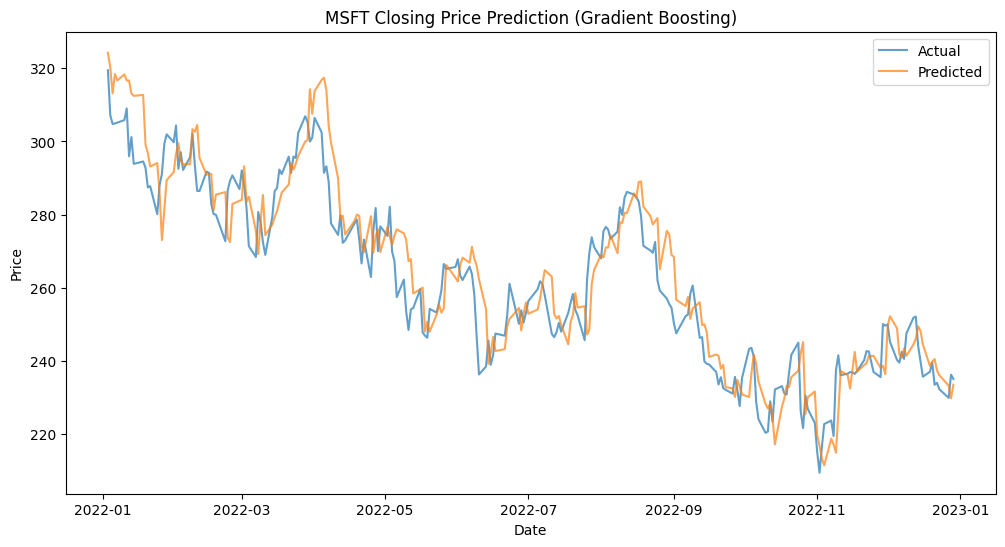

📊 Processing AMZN


/tmp/ipython-input-66-3316982394.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


✅ AMZN done: MAE=4.98, R²=0.9179


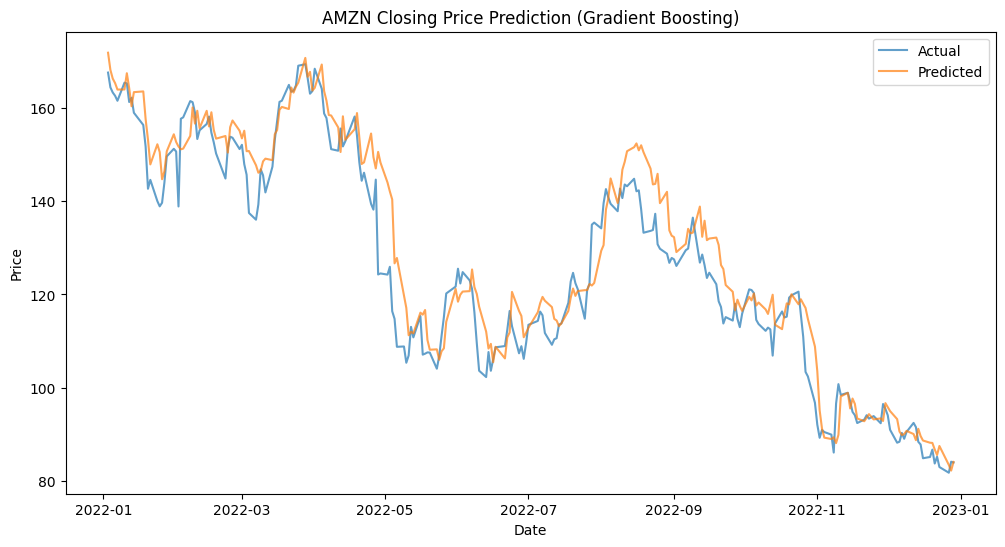

📊 Processing TSLA


/tmp/ipython-input-66-3316982394.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


✅ TSLA done: MAE=13.83, R²=0.9087


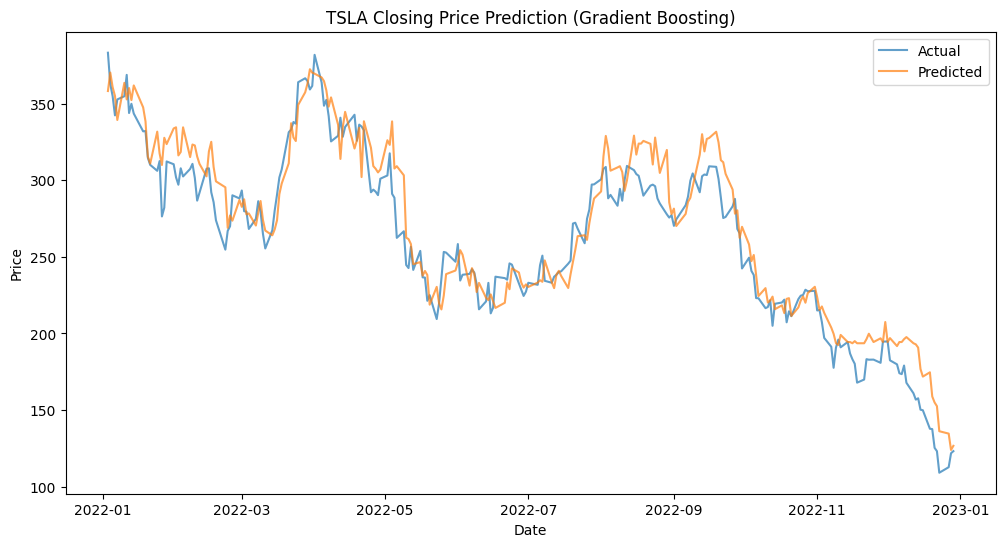

In [66]:
results = []  # reset results

for ticker in tickers:
    print(f"📊 Processing {ticker}")

    # Download dataset
    df = yf.download(ticker, start="2018-01-01", end="2023-01-01")

    # Define Target variable
    df['Target'] = df['Close'].shift(-1)

    # Feature Engineering
    df['Close_shift1'] = df['Close'].shift(1)
    df['Volume_shift1'] = df['Volume'].shift(1)
    df['Range'] = df['High'] - df['Low']
    df['Gain'] = df['Close'] - df['Open']
    df['MA5'] = df['Close'].rolling(5).mean()
    df['MA10'] = df['Close'].rolling(10).mean()
    df['Vol_MA5'] = df['Volume'].rolling(5).mean()
    df.dropna(inplace=True)

    # Define X and y
    X = df[['Close_shift1', 'Volume_shift1', 'Range', 'Gain', 'MA5', 'MA10', 'Vol_MA5']]
    y = df['Target']

    # Train/test split
    split_index = int(0.8 * len(df))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    # Train Gradient Boosting model
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Ticker': ticker,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

    print(f"✅ {ticker} done: MAE={mae:.2f}, R²={r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(12,6))
    plt.plot(y_test.index, y_test, label='Actual', alpha=0.7)
    plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
    plt.title(f"{ticker} Closing Price Prediction (Gradient Boosting)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()


In [67]:
results_df = pd.DataFrame(results)
results_df['MAE'] = results_df['MAE'].round(2)
results_df['MSE'] = results_df['MSE'].round(2)
results_df['R2'] = results_df['R2'].round(4)
results_df.set_index('Ticker', inplace=True)
results_df

,MAE,MSE,R2
Ticker,,,
AAPL,4.16,28.41,0.8202
GOOGL,3.85,23.47,0.9072
MSFT,7.24,84.11,0.8563
AMZN,4.98,46.27,0.9179
TSLA,13.83,298.20,0.9087


Gradient Boosting achieved decent results overall, but worse performance than Linear Regression on this dataset.

R² values dropped compared to Linear Regression — especially for **AAPL** (from ~0.98 → ~0.82) and **MSFT** (from ~0.98 → ~0.85).

**MAE** and **MSE** increased across all tickers, indicating larger prediction errors.
Still, **GBR** was able to maintain reasonably strong performance for **GOOGL**, **AMZN**, and **TSLA** — all above **0.90 R²**.

The weaker results may suggest that the simple, mostly linear features are better suited to a linear model than a tree-based model like **GBR**.

GBR may benefit more from additional non-linear or interaction features to fully leverage its capabilities.

##RANDOM FOREST MODEL

In [68]:
from sklearn.ensemble import RandomForestRegressor

/tmp/ipython-input-69-4007931801.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

 Processing AAPL


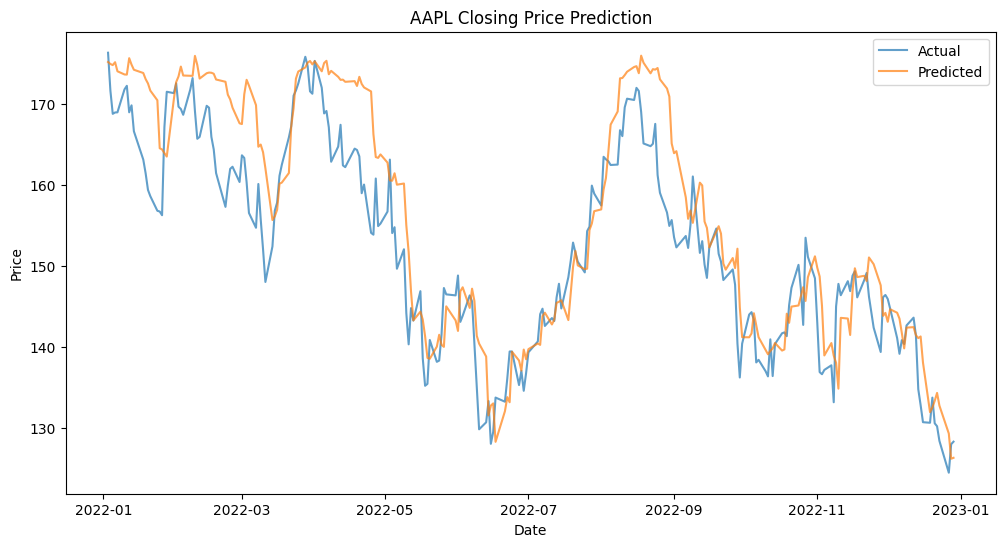

/tmp/ipython-input-69-4007931801.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

 Processing GOOGL


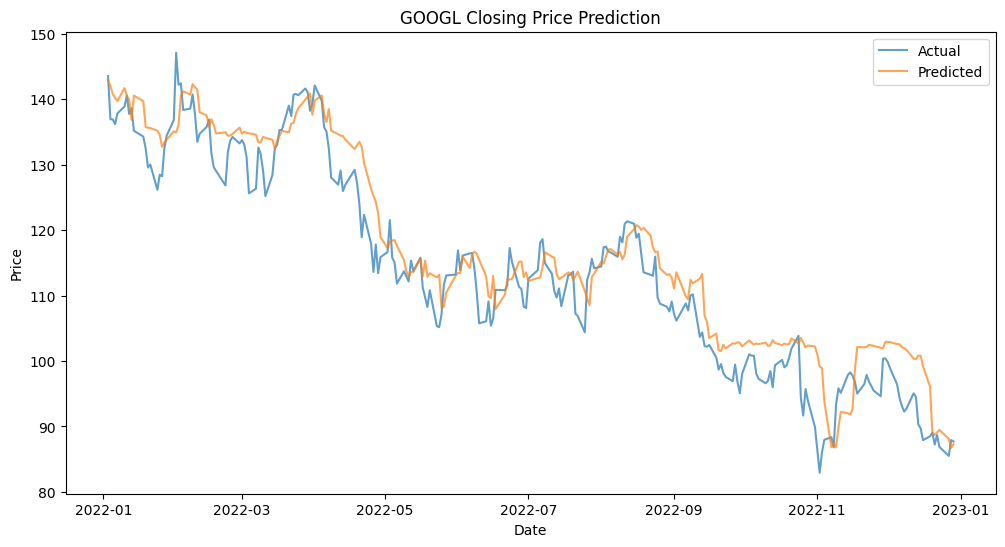

/tmp/ipython-input-69-4007931801.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

 Processing MSFT


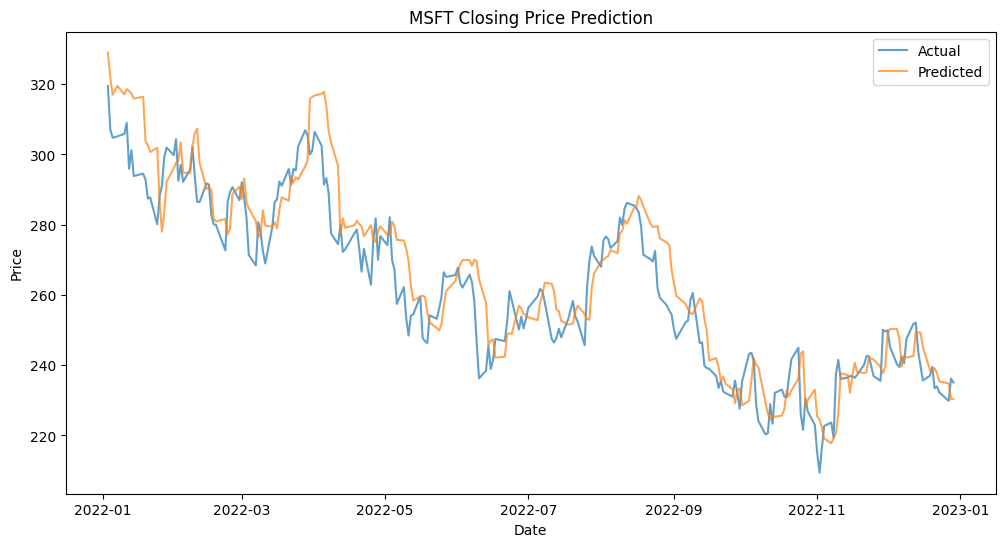

/tmp/ipython-input-69-4007931801.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

 Processing AMZN


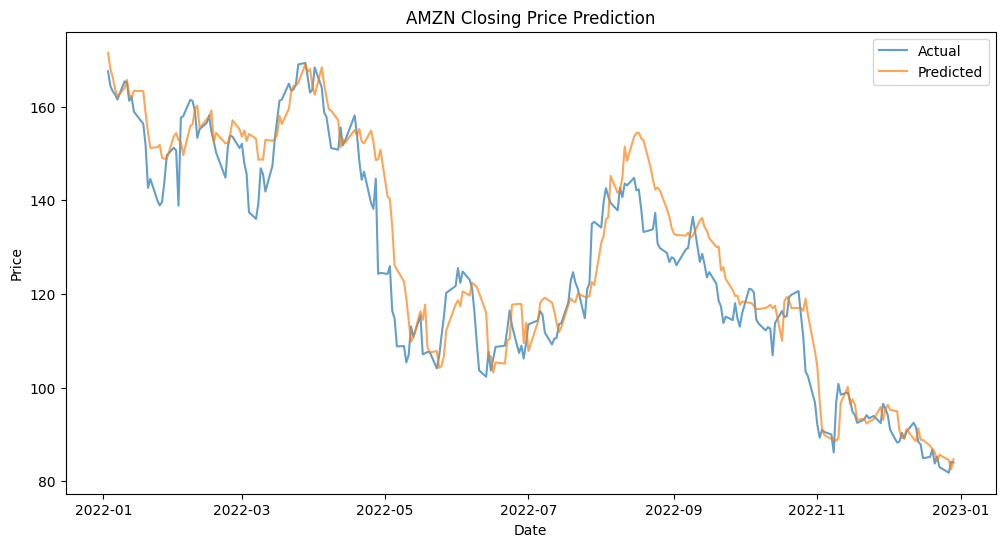

/tmp/ipython-input-69-4007931801.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

 Processing TSLA


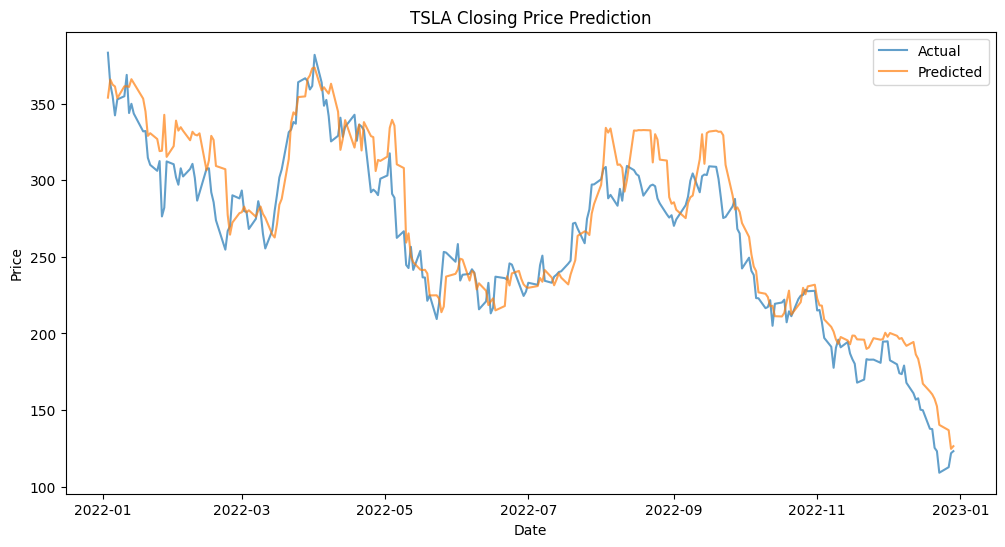

In [69]:
results = []
for ticker in tickers:
    print(f" Processing {ticker}")

    # Download dataset
    df = yf.download(ticker, start="2018-01-01", end="2023-01-01")

    # Define Target variable
    df['Target'] = df['Close'].shift(-1)

    # Feature Engineering
    df['Close_shift1'] = df['Close'].shift(1)
    df['Volume_shift1'] = df['Volume'].shift(1)
    df['Range'] = df['High'] - df['Low']
    df['Gain'] = df['Close'] - df['Open']
    df['MA5'] = df['Close'].rolling(5).mean()
    df['MA10'] = df['Close'].rolling(10).mean()
    df['Vol_MA5'] = df['Volume'].rolling(5).mean()
    df.dropna(inplace=True)

    # Define X and y
    X = df[['Close_shift1', 'Volume_shift1', 'Range', 'Gain', 'MA5', 'MA10', 'Vol_MA5']]
    y = df['Target']

    # Train/test split
    split_index = int(0.8 * len(df))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Ticker': ticker,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(y_test.index, y_test, label='Actual', alpha=0.7)
    plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
    plt.title(f"{ticker} Closing Price Prediction")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

In [70]:
results_df = pd.DataFrame(results)
results_df['MAE'] = results_df['MAE'].round(2)
results_df['MSE'] = results_df['MSE'].round(2)
results_df['R2'] = results_df['R2'].round(4)
results_df.set_index('Ticker', inplace=True)
results_df

,MAE,MSE,R2
Ticker,,,
AAPL,5.01,40.90,0.7412
GOOGL,4.14,26.85,0.8938
MSFT,7.86,97.19,0.8339
AMZN,5.44,51.46,0.9087
TSLA,15.83,402.66,0.8768


Random Forest underperformed compared to both Linear Regression and GBR on this dataset.

R² was lowest overall — especially poor for **AAPL** (0.74) and **MSFT** (~0.83), suggesting it struggled to capture the underlying trends.

**MAE** and **MSE** were also higher than other models for all tickers, showing larger prediction errors.

RF still achieved acceptable performance on **AMZN** (~0.91 R²) and **GOOGL** (**0.89 R²**), but not competitive on the others.

The relatively poor performance is likely because Random Forest models tend to overfit to noise and fail to generalize well on time series with strong linear trends.

This reinforces that the feature set favors linear models in this case.

##XGBoost Model

In [71]:
from xgboost import XGBRegressor


/tmp/ipython-input-74-1584285158.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

📊 Processing AAPL


✅ AAPL done: MAE=3.93, R²=0.8407


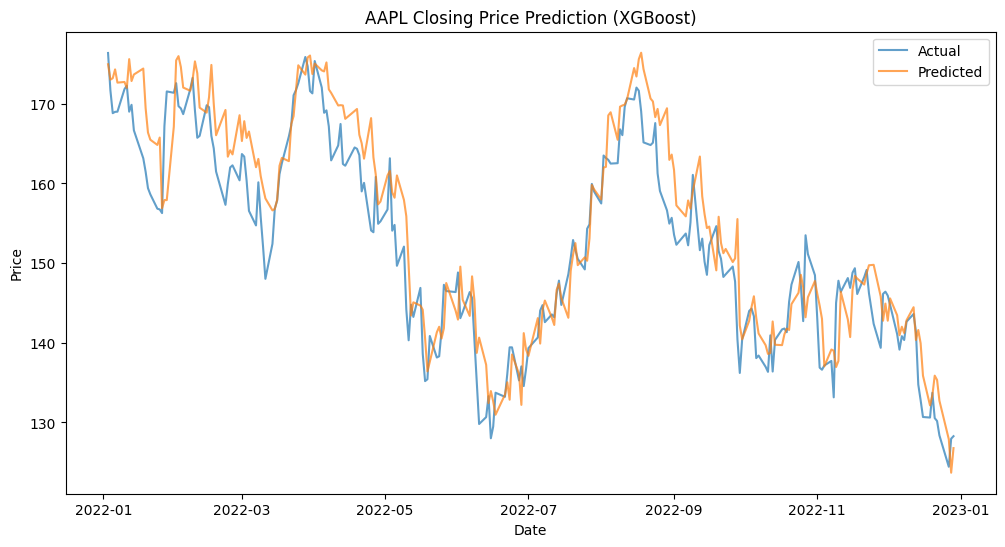

📊 Processing GOOGL


/tmp/ipython-input-74-1584285158.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


✅ GOOGL done: MAE=3.33, R²=0.9311


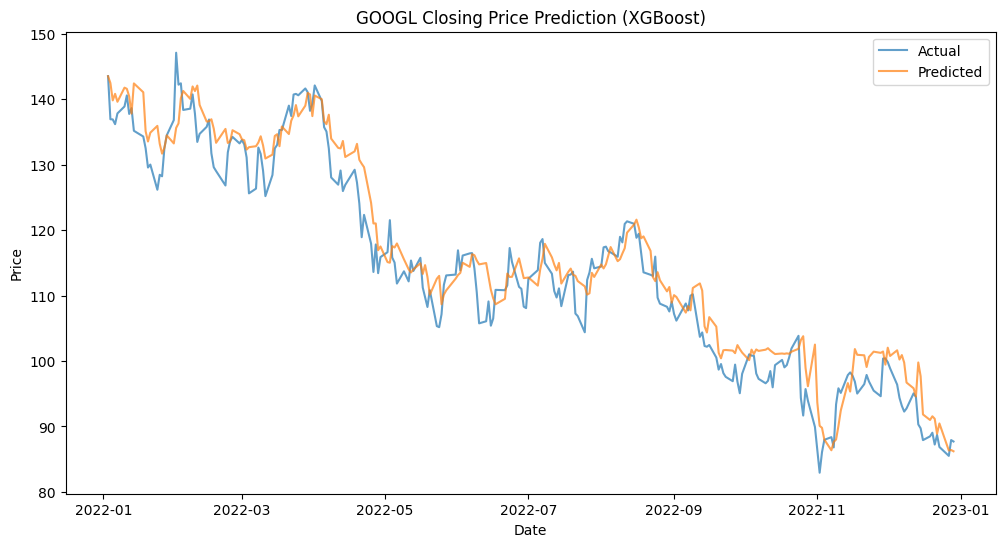

📊 Processing MSFT


/tmp/ipython-input-74-1584285158.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


✅ MSFT done: MAE=6.71, R²=0.8854


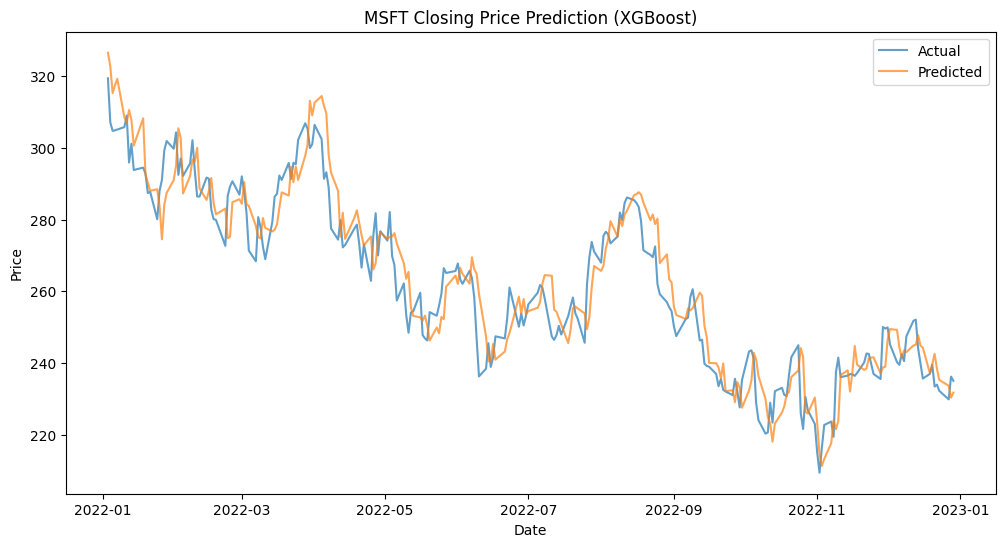

/tmp/ipython-input-74-1584285158.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

📊 Processing AMZN


✅ AMZN done: MAE=4.48, R²=0.9369


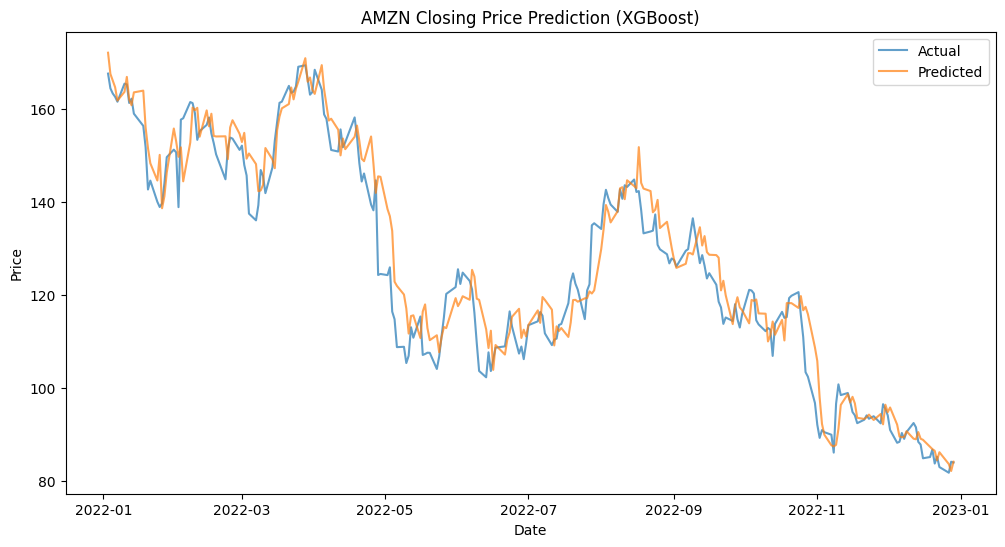

📊 Processing TSLA


/tmp/ipython-input-74-1584285158.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


✅ TSLA done: MAE=11.64, R²=0.9329


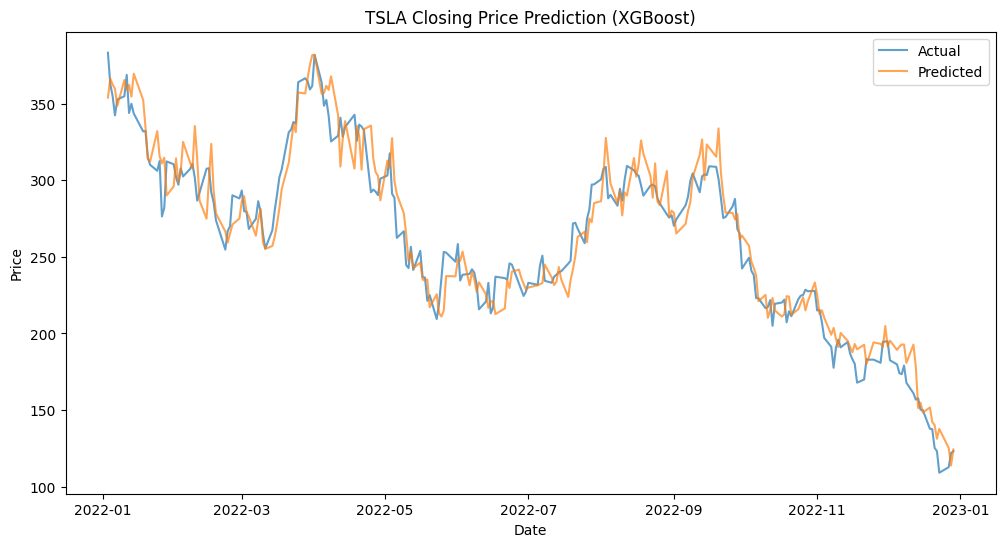

In [74]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []  # reset results

for ticker in tickers:
    print(f"📊 Processing {ticker}")

    # Download dataset
    df = yf.download(ticker, start="2018-01-01", end="2023-01-01")

    # Define Target variable
    df['Target'] = df['Close'].shift(-1)

    # Feature Engineering
    df['Close_shift1'] = df['Close'].shift(1)
    df['Volume_shift1'] = df['Volume'].shift(1)
    df['Range'] = df['High'] - df['Low']
    df['Gain'] = df['Close'] - df['Open']
    df['MA5'] = df['Close'].rolling(5).mean()
    df['MA10'] = df['Close'].rolling(10).mean()
    df['Vol_MA5'] = df['Volume'].rolling(5).mean()
    df.dropna(inplace=True)

    # Define X and y
    X = df[['Close_shift1', 'Volume_shift1', 'Range', 'Gain', 'MA5', 'MA10', 'Vol_MA5']]
    y = df['Target']

    # Train/test split
    split_index = int(0.8 * len(df))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    # Train XGBoost model
    model = model = XGBRegressor(
    n_estimators=300,         # more trees
    learning_rate=0.05,       # smaller step size
    max_depth=5,              # allow deeper trees
    subsample=0.8,            # row sampling
    colsample_bytree=0.8,     # feature sampling
    random_state=42,
    verbosity=0
)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Ticker': ticker,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

    print(f"✅ {ticker} done: MAE={mae:.2f}, R²={r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(12,6))
    plt.plot(y_test.index, y_test, label='Actual', alpha=0.7)
    plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
    plt.title(f"{ticker} Closing Price Prediction (XGBoost)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()


In [75]:
results_df = pd.DataFrame(results)
results_df['MAE'] = results_df['MAE'].round(2)
results_df['MSE'] = results_df['MSE'].round(2)
results_df['R2'] = results_df['R2'].round(4)
results_df.set_index('Ticker', inplace=True)
results_df

,MAE,MSE,R2
Ticker,,,
AAPL,3.93,25.18,0.8407
GOOGL,3.33,17.41,0.9311
MSFT,6.71,67.07,0.8854
AMZN,4.48,35.57,0.9369
TSLA,11.64,219.25,0.9329


**XGBoost delivered the best overall performance** among tree-based models.

**R²** improved over both Random Forest and GBR on all tickers — especially strong on **GOOGL** (**0.93**), **AMZN** (**0.94**), and **TSLA** (**0.93**).

**MAE** and **MSE** were lower than **RF** and **GBR**, confirming better generalization and accuracy.

Still did not outperform Linear Regression on **AAPL** and **MSFT**, indicating these stocks are strongly linear in trend.

TSLA, despite its volatility, was better handled by XGBoost than RF or GBR — showcasing its strength in capturing non-linear relationships without overfitting.

##Conclusion

The results show that Linear Regression performed exceptionally well on stocks with strong linear trends, achieving R² > 0.96 on most tickers and maintaining low MAE.

Random Forest underperformed, likely due to its tendency to overfit noise and its inability to fully capture the sequential structure of stock price data.
Gradient Boosting improved over Random Forest but still lagged behind Linear Regression on linear stocks.

XGBoost emerged as the best tree-based model, outperforming both RF and GBR, particularly on volatile stocks like TSLA, where it achieved R² ~0.93.

Overall, while Linear Regression remains a strong baseline due to the linear nature of the engineered features, XGBoost provided the best balance between capturing linear trends and handling non-linear behavior, making it the most robust choice for this task.

Future improvements could include adding more advanced time-series features, trying time-series specific models like LSTM, and tuning hyperparameters further to optimize performance.